# BAZEAN ASSESSMENT 

## Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
prod_data = pd.read_csv('ND_PRODUCTION_DATA.csv')
prod_data.head()

,state,api,date,index,volume_oil_formation_bbls,volume_gas_formation_mcf,volume_water_formation_bbls,producing_days
0,ND,33053026790000,2018-08-01,148,830,1629,234,31
1,ND,33053026790000,2018-07-01,147,917,1658,229,31
2,ND,33053026790000,2018-06-01,146,927,1478,232,30
3,ND,33053026790000,2018-05-01,145,980,1142,519,31
4,ND,33053026790000,2018-04-01,144,603,608,128,23


In [3]:
well_data = pd.read_csv('ND_WELL_DATA.csv')
well_data.head()

,api,basin_name,bazean_id,bore_profile,completion_date,county,county_id,cum_12_boe,cum_12_gas,cum_12_mcfe,...,section,spud_date,spud_ip_days,state,status,township,parent_ticker,perf_range,true_vertical_depth,well_name
0,33053026790000,WILLISTON,NaN,HORIZONTAL,2006-05-27,MCKENZIE,53,28042.333333,18920,168254,...,29,2010-09-20,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H
1,33053027070000,WILLISTON,NaN,HORIZONTAL,2006-07-22,MCKENZIE,53,15187.833333,6701,91127,...,6,2010-05-06,NaN,ND,A,147 N,NaN,4519.0,10286.46,KODIAK GRIZZLY 13-6H
2,33053027750000,WILLISTON,NaN,HORIZONTAL,2007-08-07,MCKENZIE,53,28334.166667,8317,170005,...,14,2010-07-29,NaN,ND,A,147 N,NaN,6799.0,10322.57,MAVERICK FEDERAL 1-14
3,33053030070000,WILLISTON,NaN,HORIZONTAL,2010-01-15,MCKENZIE,53,59336.333333,45554,356018,...,25,2009-09-15,134.0,ND,A,150 N,NaN,5452.0,10881.00,NATHAN HALE 4-25H
4,33053030250000,WILLISTON,NaN,HORIZONTAL,2009-11-23,MCKENZIE,53,92809.500000,71115,556857,...,13,2009-08-09,106.0,ND,A,149 N,NaN,4056.0,10936.86,CROSS 2-13H


### The prod_data is composed of time series data of oil, gas and water production per well as well as its producing days

### The well_data is composed of information regarding each well

### From the data we identify that there are 636 individual wells from 10 operators

### The operators are named below

In [4]:
#Prints name of all Operators
for i in well_data.operator_name.unique():
    print(i)

SLAWSON EXPLORATION COMPANY INC
PETRO-HUNT DAKOTA LLC
WPX ENERGY WILLISTON LLC
ENERPLUS RESOURCES USA CORPORATION
MARATHON OIL COMPANY
ABRAXAS PETROLEUM CORP
MUREX PETROLEUM CORPORATION
CRESCENT POINT ENERGY US CORP
KRAKEN OPERATING LLC
LIBERTY RESOURCES MANAGEMENT COMPANY LLC


### I converted the date column to a Pandas Datetime dataframe for analysis and obtain the year from each production record

In [5]:
#Converts the data column to Pandas Datetime object
prod_data['date'] = pd.to_datetime(prod_data.date)
#Gets years for all timeseries record
prod_data['year'] = pd.to_datetime(prod_data.date).dt.year
prod_data.head()

,state,api,date,index,volume_oil_formation_bbls,volume_gas_formation_mcf,volume_water_formation_bbls,producing_days,year
0,ND,33053026790000,2018-08-01,148,830,1629,234,31,2018
1,ND,33053026790000,2018-07-01,147,917,1658,229,31,2018
2,ND,33053026790000,2018-06-01,146,927,1478,232,30,2018
3,ND,33053026790000,2018-05-01,145,980,1142,519,31,2018
4,ND,33053026790000,2018-04-01,144,603,608,128,23,2018


### Created a column to assign the year with which each well starts producing by identifying the earliest time series data available for each well

In [6]:
#Gets earliest year for time series record and creates a separate dataframe
start_prod_year = prod_data.groupby('api').min()[['year']].reset_index()
start_prod_year.columns = ['api','start_year']
start_prod_year.head()

,api,start_year
0,33053026790000,2010
1,33053027070000,2010
2,33053027750000,2010
3,33053030070000,2010
4,33053030250000,2010


### Merge the start year from the Production data into the well data

In [7]:
#Inner joins the start_year dataframe with will data, this provides the start production year for each well
well_data = pd.merge(well_data,start_prod_year,how ='inner',on = 'api')
well_data.head()

,api,basin_name,bazean_id,bore_profile,completion_date,county,county_id,cum_12_boe,cum_12_gas,cum_12_mcfe,...,spud_date,spud_ip_days,state,status,township,parent_ticker,perf_range,true_vertical_depth,well_name,start_year
0,33053026790000,WILLISTON,NaN,HORIZONTAL,2006-05-27,MCKENZIE,53,28042.333333,18920,168254,...,2010-09-20,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010
1,33053027070000,WILLISTON,NaN,HORIZONTAL,2006-07-22,MCKENZIE,53,15187.833333,6701,91127,...,2010-05-06,NaN,ND,A,147 N,NaN,4519.0,10286.46,KODIAK GRIZZLY 13-6H,2010
2,33053027750000,WILLISTON,NaN,HORIZONTAL,2007-08-07,MCKENZIE,53,28334.166667,8317,170005,...,2010-07-29,NaN,ND,A,147 N,NaN,6799.0,10322.57,MAVERICK FEDERAL 1-14,2010
3,33053030070000,WILLISTON,NaN,HORIZONTAL,2010-01-15,MCKENZIE,53,59336.333333,45554,356018,...,2009-09-15,134.0,ND,A,150 N,NaN,5452.0,10881.00,NATHAN HALE 4-25H,2010
4,33053030250000,WILLISTON,NaN,HORIZONTAL,2009-11-23,MCKENZIE,53,92809.500000,71115,556857,...,2009-08-09,106.0,ND,A,149 N,NaN,4056.0,10936.86,CROSS 2-13H,2010


### Merge Production data with the well data so as to perform a wholesome analysis

In [8]:
# Inner joins production adnd well data
well_prod = pd.merge(prod_data,well_data, how = 'inner', on = 'api')
well_prod.head()

,state_x,api,date,index,volume_oil_formation_bbls,volume_gas_formation_mcf,volume_water_formation_bbls,producing_days,year,basin_name,...,spud_date,spud_ip_days,state_y,status,township,parent_ticker,perf_range,true_vertical_depth,well_name,start_year
0,ND,33053026790000,2018-08-01,148,830,1629,234,31,2018,WILLISTON,...,2010-09-20,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010
1,ND,33053026790000,2018-07-01,147,917,1658,229,31,2018,WILLISTON,...,2010-09-20,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010
2,ND,33053026790000,2018-06-01,146,927,1478,232,30,2018,WILLISTON,...,2010-09-20,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010
3,ND,33053026790000,2018-05-01,145,980,1142,519,31,2018,WILLISTON,...,2010-09-20,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010
4,ND,33053026790000,2018-04-01,144,603,608,128,23,2018,WILLISTON,...,2010-09-20,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010


### Drop datapoints where monthly production is 0 bbls (infinite GOR?)

In [9]:
#Mask removes well with 0 monthly production 
well_prod = well_prod[well_prod.volume_oil_formation_bbls != 0]

### Created GOR column by dividing gas production by Oil Production

In [10]:
#Create GOR column by dividing gas production by oil production
well_prod['GOR'] = well_prod.volume_gas_formation_mcf/well_prod.volume_oil_formation_bbls
well_prod.head()

,state_x,api,date,index,volume_oil_formation_bbls,volume_gas_formation_mcf,volume_water_formation_bbls,producing_days,year,basin_name,...,spud_ip_days,state_y,status,township,parent_ticker,perf_range,true_vertical_depth,well_name,start_year,GOR
0,ND,33053026790000,2018-08-01,148,830,1629,234,31,2018,WILLISTON,...,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010,1.962651
1,ND,33053026790000,2018-07-01,147,917,1658,229,31,2018,WILLISTON,...,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010,1.808070
2,ND,33053026790000,2018-06-01,146,927,1478,232,30,2018,WILLISTON,...,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010,1.594391
3,ND,33053026790000,2018-05-01,145,980,1142,519,31,2018,WILLISTON,...,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010,1.165306
4,ND,33053026790000,2018-04-01,144,603,608,128,23,2018,WILLISTON,...,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010,1.008292


## Outlier Detection

### Created functions that removes outliers based on particular variable for each well. It is important the outlier detection is on a well by well basis as conditions that satisfy outlier status for one well is likely not to satisfy outlier status for another well.

### The outlier function detects outliers by centering the data (subtracting the mean) and compares the centered points with the standard deviation, points that are some preselected distance away from the standard deviation are considered outliers (for this case I selected 1.5, it could be altered by the user)  are dropped.

In [11]:
def remove_outliers(df, based_on, threshold):
    df1 = df.copy() #Create copy of dataframe (avoids altering original data)
    company = np.sort(df1.operator_name.unique()) #Get operators
    for op in company: #Get all wells by company by loop (not really necessary to add company)
        prod_year = np.sort(df1[df1.operator_name == op].start_year.unique())
        for year in prod_year:
            well = df1[(df1.operator_name == op)& (df1.start_year == year)].api.unique()
            for api in well:
                label = np.array(df1.index) #Obtain row index
                final = df1[(df1.operator_name == op) & (df1.start_year == year) & (df1.api == api)] #get well
                label_x = label[(df1.operator_name == op) & (df1.start_year == year) & (df1.api == api)] #get row index of wells selected
                absolute_differences_from_mean = np.abs(final[based_on] - np.mean(final[based_on]))#center data
                this_mask = absolute_differences_from_mean > (np.std(final[based_on]) * threshold) # get points that exceed threshold
                label_y = label_x[this_mask] #obtain row index which exceed outlier threshold
                df1.drop(label_y, axis = 0, inplace = True) #drop those points and continue loop
    return df1.reset_index()

In [12]:
clean_data_gor = remove_outliers(well_prod,'GOR',1.5) #Use function
clean_data_gor.head()

,level_0,state_x,api,date,index,volume_oil_formation_bbls,volume_gas_formation_mcf,volume_water_formation_bbls,producing_days,year,...,spud_ip_days,state_y,status,township,parent_ticker,perf_range,true_vertical_depth,well_name,start_year,GOR
0,3,ND,33053026790000,2018-05-01,145,980,1142,519,31,2018,...,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010,1.165306
1,4,ND,33053026790000,2018-04-01,144,603,608,128,23,2018,...,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010,1.008292
2,5,ND,33053026790000,2018-03-01,143,719,751,183,31,2018,...,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010,1.044506
3,6,ND,33053026790000,2018-02-01,142,717,742,191,27,2018,...,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010,1.034868
4,7,ND,33053026790000,2018-01-01,141,743,763,203,27,2018,...,NaN,ND,A,148 N,NaN,4633.0,10694.11,STILETTO FEDERAL 1-29H,2010,1.026918


## Plots
### Creates GOR profile for each well which started producing in a particular year for each company

#### This function is helpful if you want to look at the individual wells GOR by each company in term of year of start of production and not ust the average GORs

In [13]:
def make_plots(df):
    company = np.sort(df.operator_name.unique())
    for op in company:
        prod_year = np.sort(df[df.operator_name == op].start_year.unique())
        for year in prod_year:
            well = df[(df.operator_name == op)& (df.start_year == year)].api.unique()
            fig = plt.figure(figsize = (20,10))
            plt.title(op + ' GOR Profile ' + 'for wells put in Production in ' + str(year), fontsize = 30 )
            plt.xticks(fontsize = 15)
            plt.yticks(fontsize = 15)
            plt.ylabel('GOR',fontsize = 25)
            for api in well:
                final = df[(df.operator_name == op) & (df.start_year == year) & (df.api == api)].sort_values('date')#[['date','GOR']]
                plt.plot(final['date'], final['GOR'],label = api)
                plt.legend(loc=2, prop={'size': 20})

### Creates the Average GOR Profile for each Company by year put on Production

#### To provide a meaningful and interpretable plot I used a 6 points to form a moving average. Again that can be changed by the user.  

In [14]:
def make_plots_avg(df, avg):
    company = np.sort(df.operator_name.unique())
    for i in range(company.shape[0]):
        well = df[(df.operator_name == company[i])]
        well_x = well.groupby(['date','start_year']).mean().sort_values(['date','start_year'])[['GOR']].unstack().interpolate(method = 'time').rolling(avg).mean().plot(figsize = (15,10))
        plt.title('AVERAGE GOR for  ' + company[i], fontsize = 30 )
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.ylabel('AVERAGE GOR',fontsize = 18)
        plt.xlabel('YEAR',fontsize = 18)

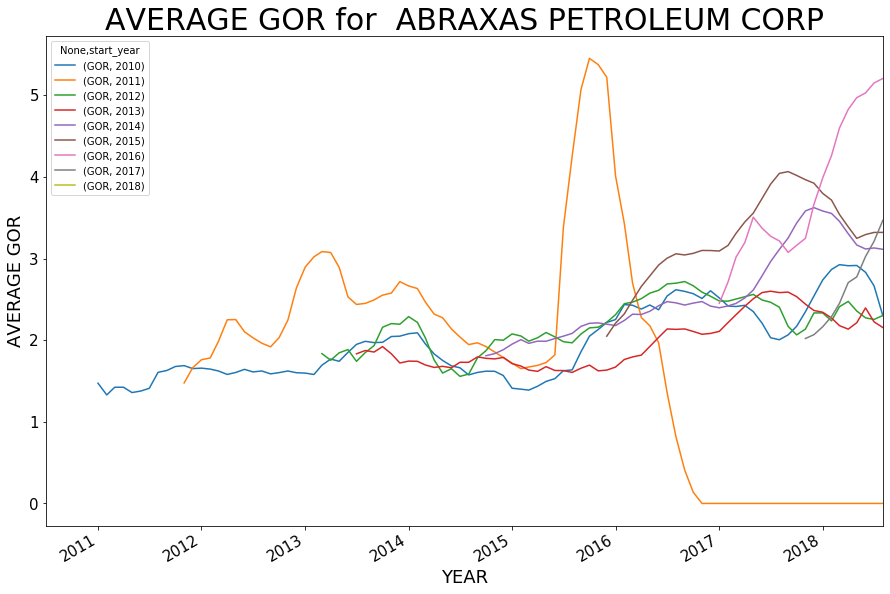

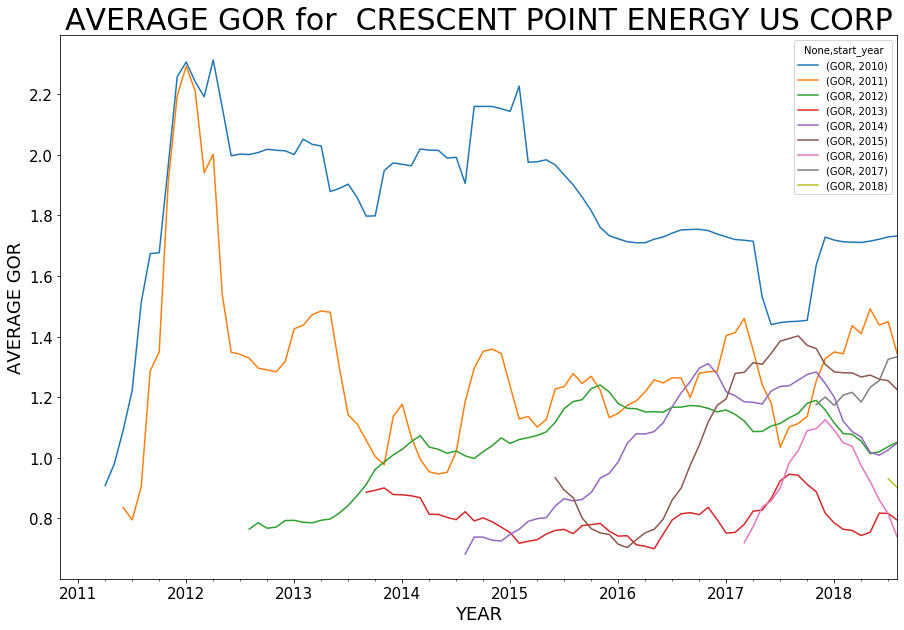

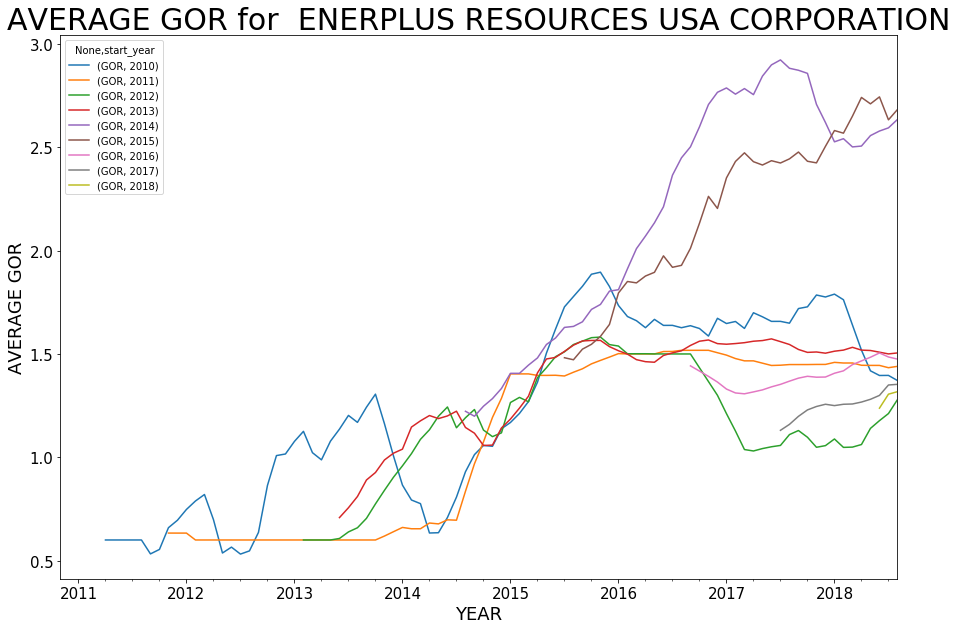

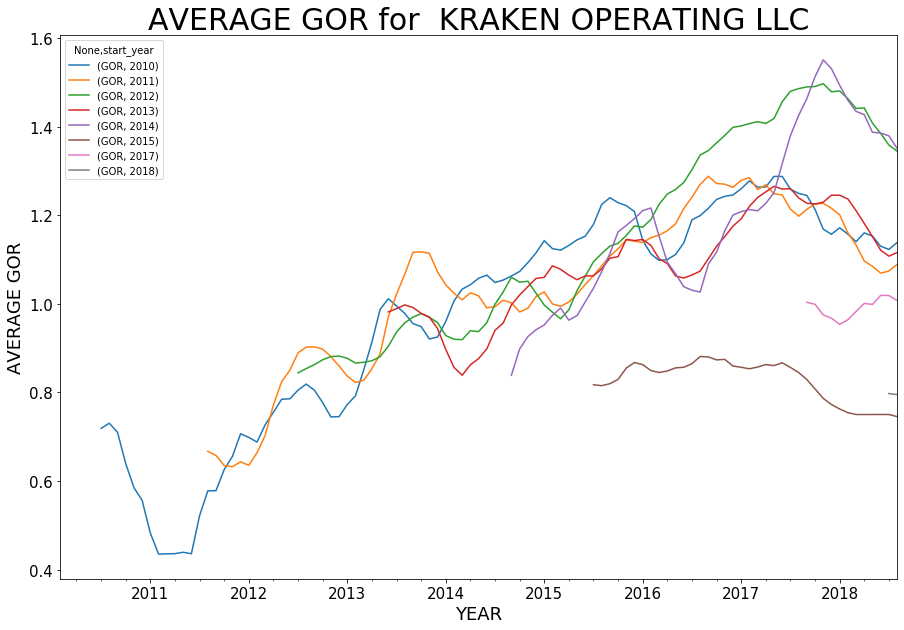

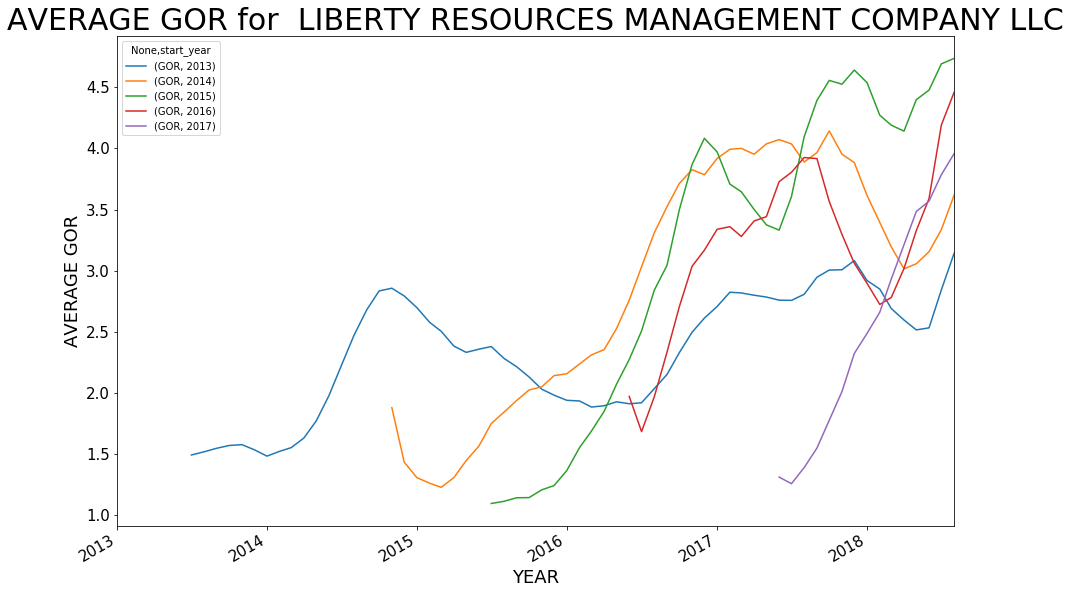

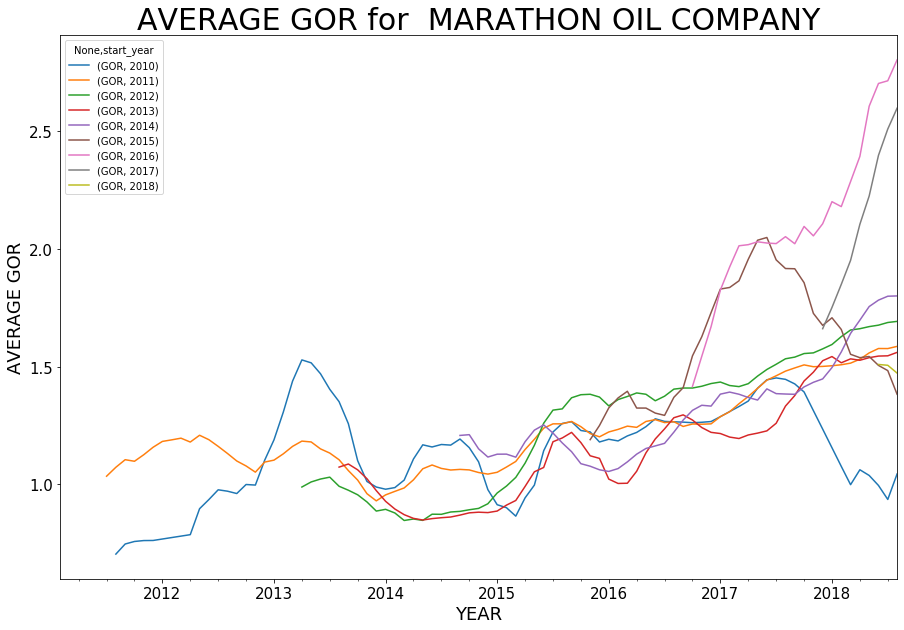

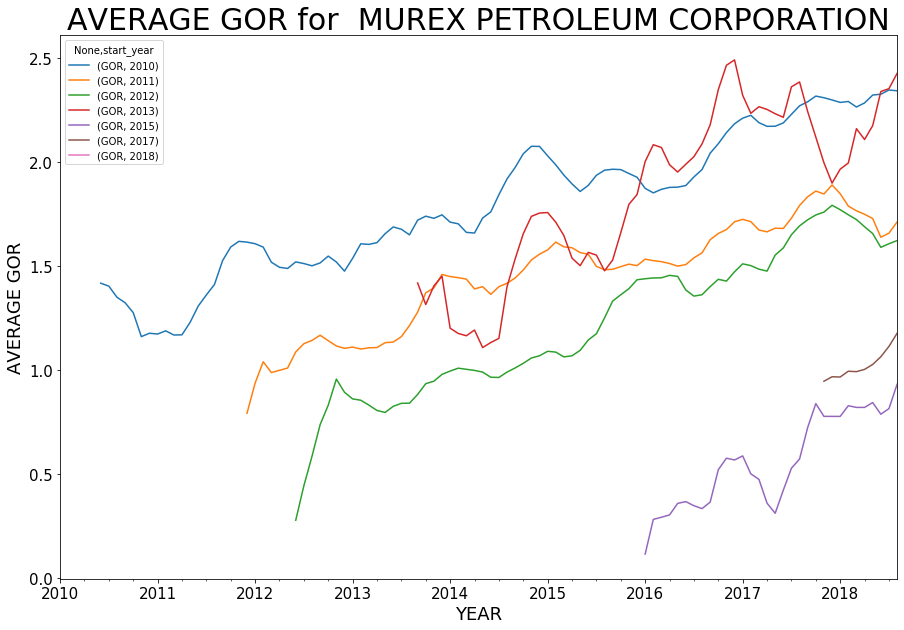

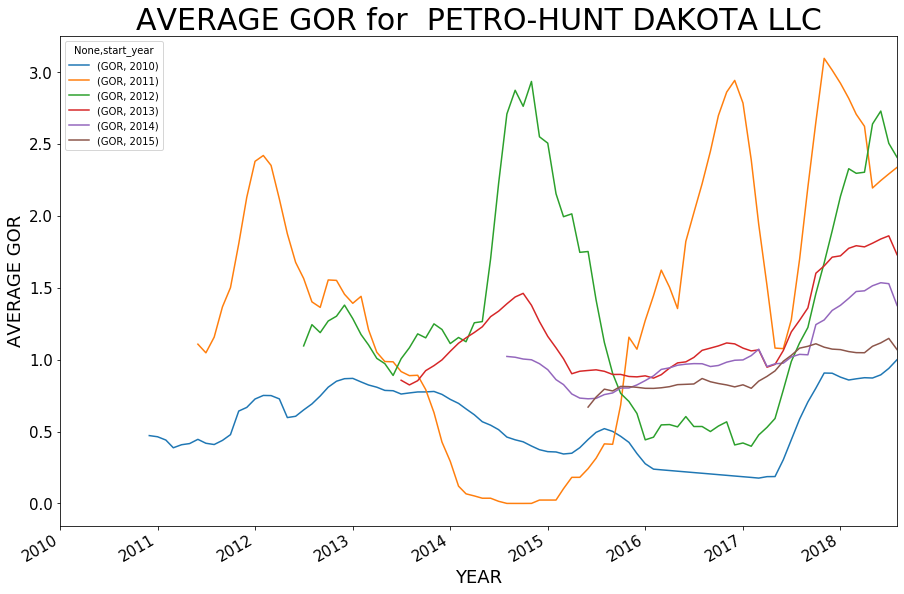

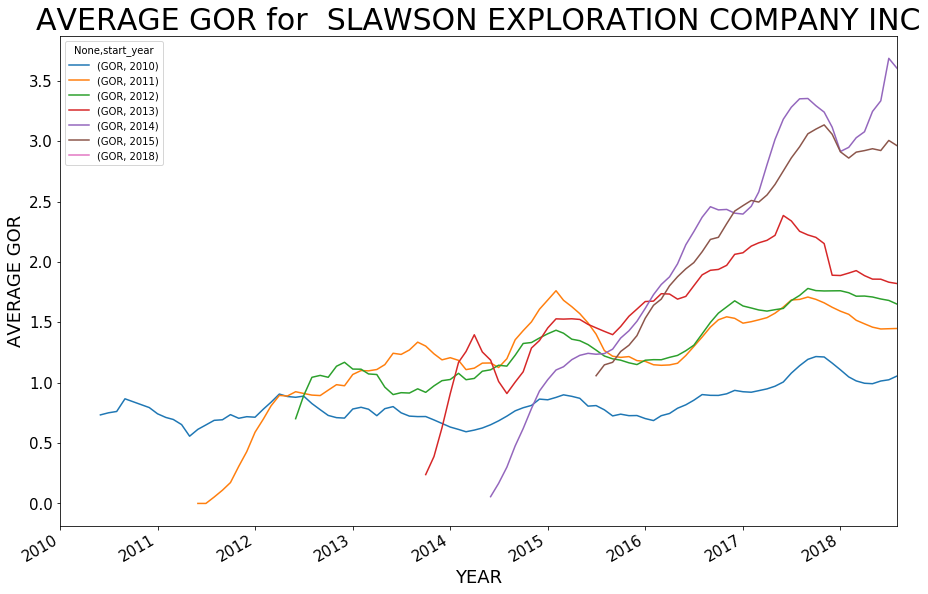

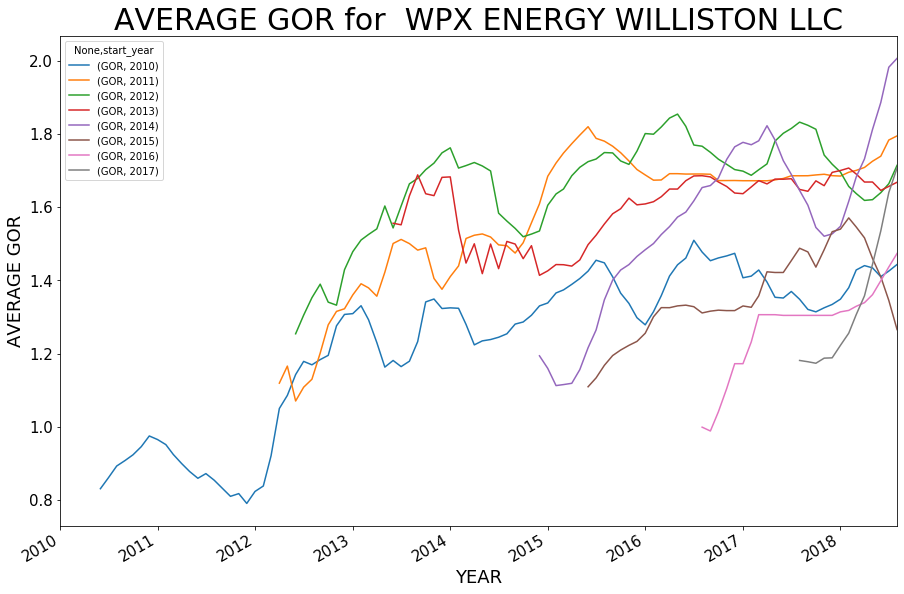

In [15]:
make_plots_avg(clean_data_gor,6)

### Below is a statistical summary of the GORs for each company in term of start year of production

In [17]:
gor_summary = clean_data_gor.groupby(['operator_name','start_year']).mean()[['GOR']]
gor_summary['Minimum GOR'] = clean_data_gor.groupby(['operator_name','start_year']).min()[['GOR']]
gor_summary['Maximum GOR'] = clean_data_gor.groupby(['operator_name','start_year']).max()[['GOR']]
gor_summary['GOR Standard Deviation'] = clean_data_gor.groupby(['operator_name','start_year']).std()[['GOR']]
gor_summary['Number of data points Used'] = clean_data_gor.groupby(['operator_name','start_year']).count()[['GOR']]
gor_summary.columns = ['MEAN GOR (mcf/bbl)', 'MIN GOR (mcf/bbl)', 'MAX GOR (mcf/bbl)', 'STD GOR (mcf/bbl)', 'Number of Datapoints Available']
gor_summary

MEAN GOR (mcf/bbl)  MIN GOR (mcf/bbl)  \
operator_name            start_year                                          
ABRAXAS PETROLEUM CORP   2010                  1.871747           0.588039   
                         2011                  2.514514           0.000000   
                         2012                  2.216612           0.657419   
                         2013                  1.958300           0.797241   
                         2014                  2.578747           0.844555   
...                                                 ...                ...   
WPX ENERGY WILLISTON LLC 2013                  1.615572           0.576707   
                         2014                  1.574570           0.434132   
                         2015                  1.323316           0.991364   
                         2016                  1.276649           0.323881   
                         2017                  1.363824           0.795960   

                                     MAX GOR (mcf/bbl)  STD GOR (mcf/bbl)  \
operator_name            start_year                                         
ABRAXAS PETROLEUM CORP   2010                 3.134597           0.560907   
                         2011                10.922078           1.712229   
                         2012                 3.631803           0.600195   
                         2013                 5.386131           0.810716   
                         2014                 5.964240           0.946273   
...                                                ...                ...   
WPX ENERGY WILLISTON LLC 2013                 2.432271           0.331884   
                         2014                 4.387062           0.562638   
                         2015                 2.259953           0.199043   
                         2016                 2.176153           0.224929   
                         2017                 4.347272           0.471943   

                                     Number of Datapoints Available  
operator_name            start_year                                  
ABRAXAS PETROLEUM CORP   2010                                   154  
                         2011                                    50  
                         2012                                   125  
                         2013                                   491  
                         2014                                   430  
...                                                             ...  
WPX ENERGY WILLISTON LLC 2013                                   291  
                         2014                                   517  
                         2015                                   114  
                         2016                                   162  
                         2017                                   263  

[77 rows x 5 columns]

### The Average GOR ranges from 0.5 - 3.8 mcf/bbl. From the plot it shows that the GOR generally increases irrespective of year put into production. Although Crescent point energy seems to have a steady GOR values Increase in GOR is likely due to large drop in pressure leading to lower oil production and more gas released from solution

### The MAX GOR occurs in a well which started producing in 2013 operated by Liberty Resource Management of 14mcf/bbl

## BAR PLOTS OF THE STATISTICAL SUMMARY

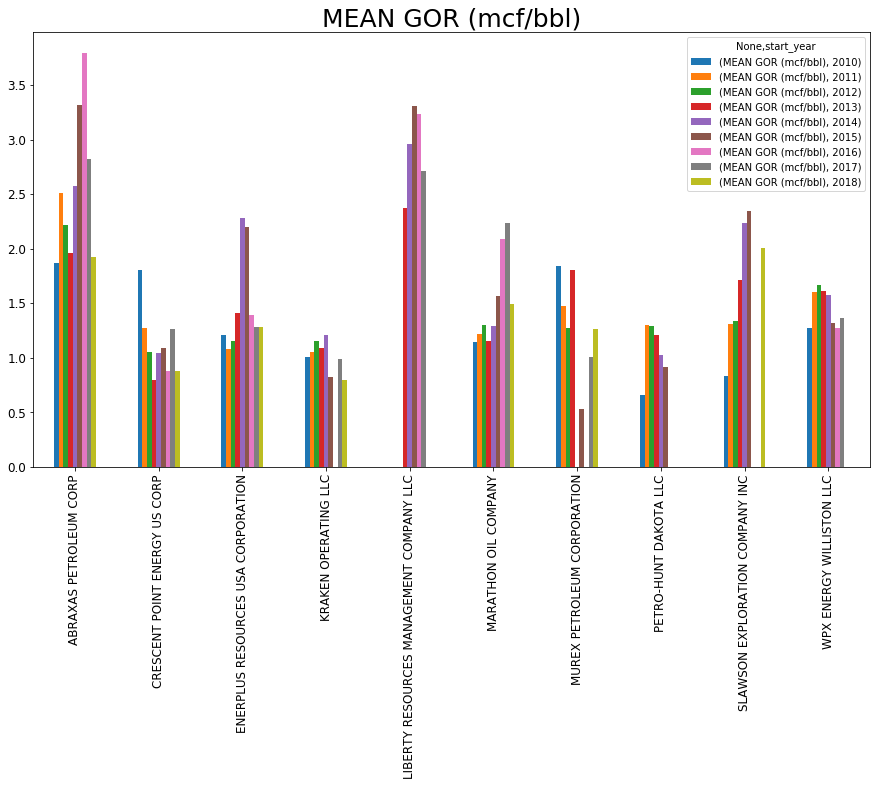

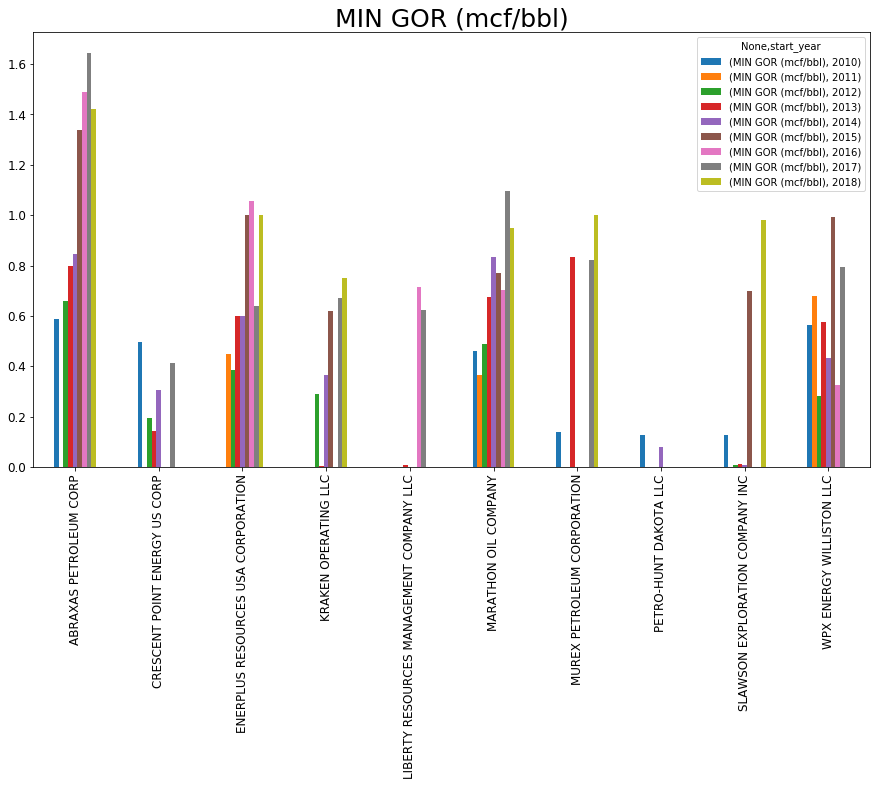

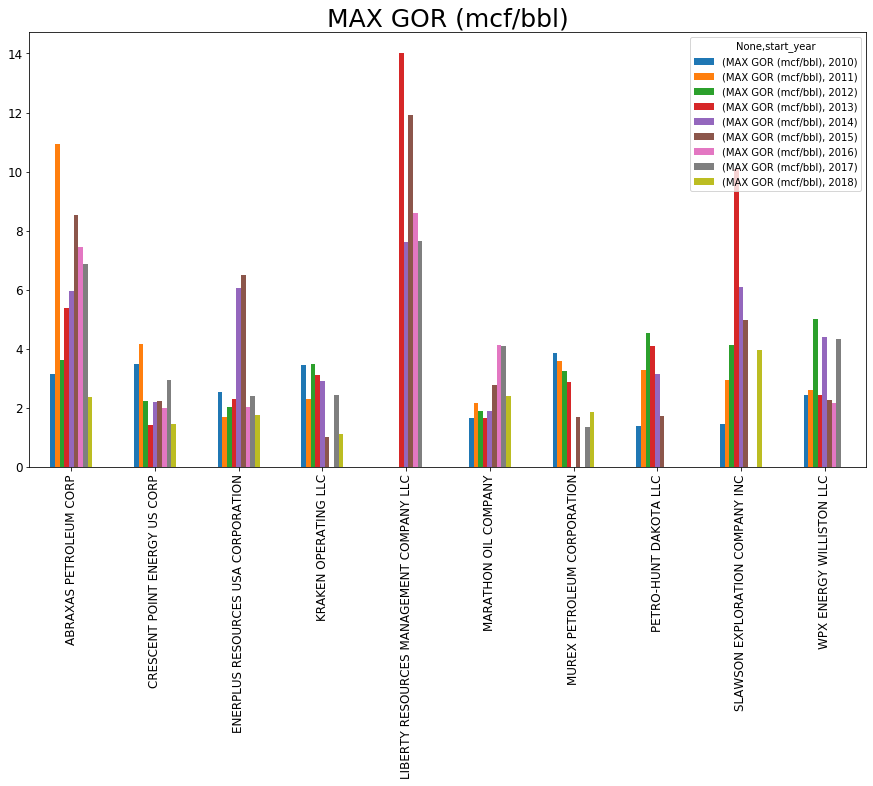

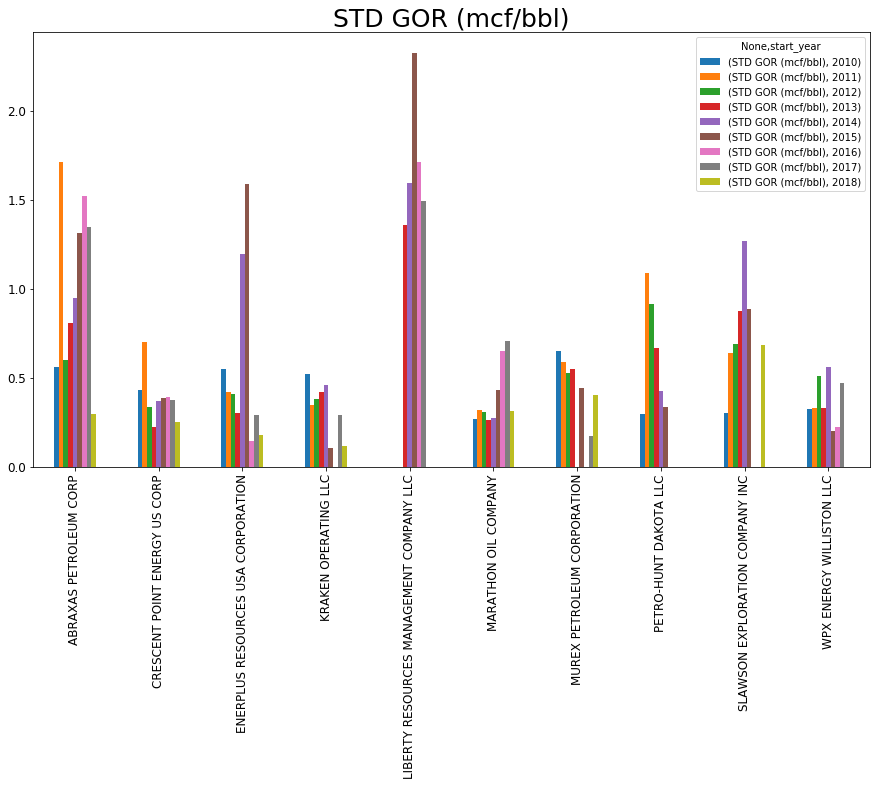

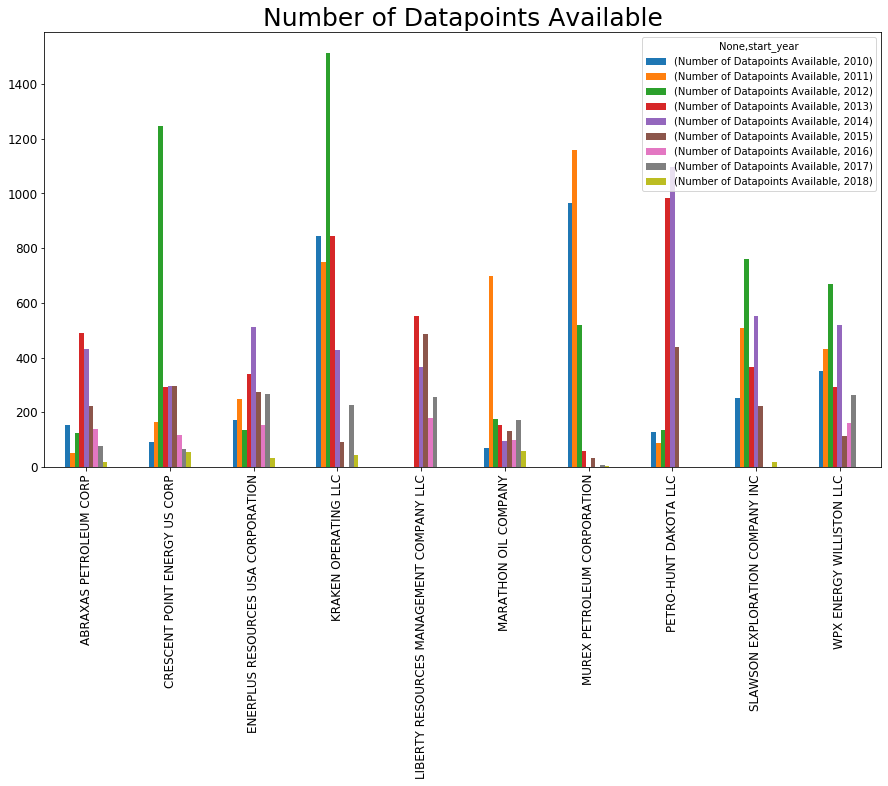

In [18]:
for i in gor_summary.columns:
    gor_summary[[i]].unstack().plot(kind = 'bar', figsize = (15,8))
    plt.title(i, fontsize = 25)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xlabel('')

# QUESTION 2

## Describe and Summarize EUR for well which started Producing in 2015

### Obtain active well which started producing in 2015

In [19]:
well_15 = well_prod[(well_prod.start_year == 2015)& (well_prod.status == 'A')]
well_15.head()

,state_x,api,date,index,volume_oil_formation_bbls,volume_gas_formation_mcf,volume_water_formation_bbls,producing_days,year,basin_name,...,spud_ip_days,state_y,status,township,parent_ticker,perf_range,true_vertical_depth,well_name,start_year,GOR
5016,ND,33053037830000,2018-08-01,43,1089,2602,4554,31,2018,WILLISTON,...,203.0,ND,A,150 N,NaN,9676.0,11001.74,MANDAN 150-94-32C-29H TF,2015,2.389348
5017,ND,33053037830000,2018-07-01,42,1834,2602,3031,31,2018,WILLISTON,...,203.0,ND,A,150 N,NaN,9676.0,11001.74,MANDAN 150-94-32C-29H TF,2015,1.418757
5018,ND,33053037830000,2018-06-01,41,1486,2048,3335,22,2018,WILLISTON,...,203.0,ND,A,150 N,NaN,9676.0,11001.74,MANDAN 150-94-32C-29H TF,2015,1.378197
5019,ND,33053037830000,2018-05-01,40,1774,2358,6227,30,2018,WILLISTON,...,203.0,ND,A,150 N,NaN,9676.0,11001.74,MANDAN 150-94-32C-29H TF,2015,1.329200
5020,ND,33053037830000,2018-04-01,39,37,557,1093,11,2018,WILLISTON,...,203.0,ND,A,150 N,NaN,9676.0,11001.74,MANDAN 150-94-32C-29H TF,2015,15.054054


## There are 66 active wells that started production in 2015

In [20]:
print('There are '+str(well_15.api.unique().shape[0])+' wells that are active which started producing in 2015')

There are 66 wells that are active which started producing in 2015


### The code below plots the production profile for every active well that started producing in 2015

In [21]:
for i in well_15.api.unique():
    clean_well_15.set_index(['api','date']).sort_values(['api','date'])[['volume_oil_formation_bbls']].loc[i,:].rolling(4).median().plot(figsize = (15,8))
    plt.title('Production Profile for Well ' + str(i))

NameError: name 'clean_well_15' is not defined

## Function below gets the EUR for each well

In [25]:
def hyperbolic_equation(t, qi, b, di):
    """
    Hyperbolic decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        b: Float. Hyperbolic decline constant
        di: Float. Nominal decline rate at time t=0
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi/((1.0+b*di*t)**(1.0/b))

In [22]:
def get_eur(df,lr):
    eur = []
    from scipy.optimize import curve_fit
    unique_well = np.sort(well_15.api.unique())
    for i in unique_well:
        sort_df = df.set_index(['api','date']).sort_values(['api','date'])[['volume_oil_formation_bbls']].loc[i].rolling(4).mean()
        sort_df.dropna(inplace = True)
        range_ = int(sort_df.shape[0]*0.05)
        ss = sort_df.reset_index().iloc[range_:,:].volume_oil_formation_bbls.idxmax()
        max_rate = sort_df.iloc[range_:,:].volume_oil_formation_bbls.max()
        cum_to_max = sort_df.reset_index().iloc[:ss,:].volume_oil_formation_bbls.sum()
        popt_hyp, pcov_hyp = curve_fit(hyperbolic_equation, np.arange(sort_df.iloc[ss:,:].shape[0]), sort_df['volume_oil_formation_bbls'][ss:,],bounds=(0, [max_rate,2,20]))
        start = sort_df.reset_index()['date'].iloc[ss-1]
        end = sort_df.reset_index()['date'].iloc[-1]
        duration = pd.date_range(start,end,freq = 'M')
        t = np.arange(duration.shape[0])
        dc = max_rate/((1.0+popt_hyp[1]*popt_hyp[2]*t)**(1.0/popt_hyp[1]))
        eur.append((((max_rate**popt_hyp[1])/((1-popt_hyp[1])*popt_hyp[2]))*((max_rate**(1-popt_hyp[1]))- (lr**(1-popt_hyp[1])))) - np.sum(dc) + sort_df['volume_oil_formation_bbls'].sum()) 
    return np.array(eur)

## Function below gets the Decline Curve fit for a particular well

In [23]:
def get_curve(df, well):
    from scipy.optimize import curve_fit
    sort_df = df.set_index(['api','date']).sort_values(['api','date'])[['volume_oil_formation_bbls']].loc[well].rolling(4).mean()
    sort_df.dropna(inplace = True)
    range_ = int(sort_df.shape[0]*0.05)
    ss = sort_df.reset_index().iloc[range_:,:].volume_oil_formation_bbls.idxmax()
    max_rate = sort_df.iloc[range_:,:].volume_oil_formation_bbls.max()
    cum_to_max = sort_df.reset_index().iloc[:ss,:].volume_oil_formation_bbls.sum()
    popt_hyp, pcov_hyp = curve_fit(hyperbolic_equation, np.arange(sort_df.iloc[ss:,:].shape[0]), sort_df['volume_oil_formation_bbls'][ss:,],bounds=(0, [max_rate,2,20]))
    plt.figure(figsize=(15,8))
    start = sort_df.reset_index()['date'].iloc[ss-1]
    end = sort_df.reset_index()['date'].iloc[-1]
    duration = pd.date_range(start,end,freq = 'M')
    t = np.arange(duration.shape[0])
    dc = max_rate/((1.0+popt_hyp[1]*popt_hyp[2]*t)**(1.0/popt_hyp[1]))
    if ss == 0:
        plt.plot(sort_df.reset_index()['date'], sort_df['volume_oil_formation_bbls'], label = 'Actual Production Profile')
        plt.plot(duration,dc, label = 'Hyperbolic Decline Curve', linewidth = 3, c = 'red')
    else:
        plt.plot(sort_df.reset_index()['date'], sort_df['volume_oil_formation_bbls'], label = 'Actual Production Profile')
        plt.plot(duration,dc, label = 'Hyperbolic Decline Curve', linewidth = 3, c = 'red')
        plt.legend(fontsize = 18)
    plt.xlabel('Time', fontsize = 18)
    plt.ylabel('Oil Production (bbl)', fontsize = 18)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title('Decline curve for Well ' + str(i), fontsize = 30)

## I created a correlation matrix HEAT MAP to check what factors affected EUR

### As can be expected the cummulative production after 6 months, 12 months of oil and gas production and IP_30, IP_24 correlates positively with the EUR as can be seen in the correlation heatmap below

### However I observed perf_bottom (assumed depth of bottom perforation), latitude bottom hole, latitude surface hole and measured depth has a good correlation with EUR

/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


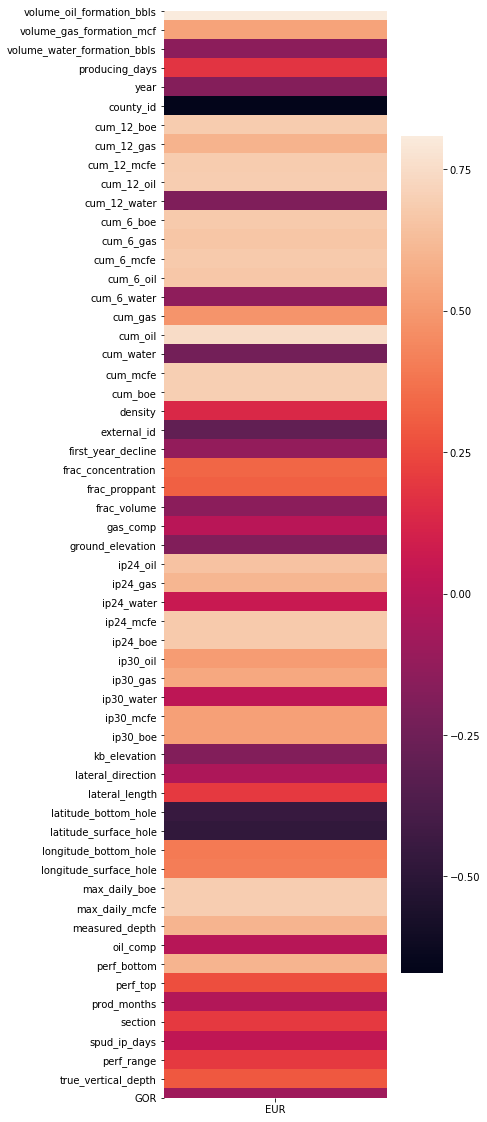

In [26]:
eur_summary = well_15.groupby(['operator_name','api']).mean().sort_values('api')#[['GOR']]
eur_summary['EUR'] = get_eur(well_15,500)
plt.figure(figsize=(5,20))
sb.heatmap(eur_summary.corr('spearman')[['EUR']].dropna().drop(['index','EUR']))

## The variable mentioned above is selected and analyzed with EUR. 

### A couple of things are observed, the well with the lowest EUR has an API number of 33105037800000 operated by Liberty Resources Management Comapny LLC, the well with highest EUR has an API number 33053047870000 operated by ENERPLUS RESOURCES USA CORPORATION.

### I observed that Enerplus Resources USA has a lot of relatively high EUR wells which started production in 2015 with the top 4 wells with the highest EURs being operated by Enerplus

### Observing some correlation there also seems to be correlation between the measured depth of the well and the EUR with wells with higher measured depth and perf bottom having higher EURs. This could simply be due to longer laterals (increased surface area open to flow) but there seems to be no correlation between EUR and perf range (assumed length of perforated interval) although the high EUR wells all had high perf ranges but they were also low EUR wells that had a high perf_range.

### Another related point to the aforemention is that the relatively high EUR wells seems to be drilled in the McKenzie county, again this could likely be because the companies with the better completion practices own acreage in McKenzie and not Williams or it could be the spots in the McKenzie county is better

### Another point observed is that as the latitude_bottom_hole increases there seems to be a decrease in EUR. Basically this is showing that in particular areas there is better EUR, however it is important to note that this could be due to better completion practices by the companies who own the acreage and not necessarily the prolificity of the acreage itself .

In [27]:
eur_summary_plus = well_15.groupby(['operator_name','api']).mean().sort_values('api')[['latitude_surface_hole','latitude_bottom_hole','perf_bottom','measured_depth','perf_range','frac_proppant','frac_concentration','county_id']]
eur_summary_plus['EUR'] = get_eur(well_15,500)
eur_summary_plus.sort_values('EUR')

/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


latitude_surface_hole  \
operator_name                            api                                     
LIBERTY RESOURCES MANAGEMENT COMPANY LLC 33105037800000              48.503797   
CRESCENT POINT ENERGY US CORP            33105037880000              48.517134   
SLAWSON EXPLORATION COMPANY INC          33105036360000              48.158289   
CRESCENT POINT ENERGY US CORP            33105037890000              48.518482   
PETRO-HUNT DAKOTA LLC                    33053060410000              47.675655   
...                                                                        ...   
                                         33053066510000              47.647922   
ENERPLUS RESOURCES USA CORPORATION       33053047860000              47.758899   
                                         33053037850000              47.761588   
                                         33053037840000              47.761527   
                                         33053047870000              47.758865   

                                                         latitude_bottom_hole  \
operator_name                            api                                    
LIBERTY RESOURCES MANAGEMENT COMPANY LLC 33105037800000             48.474546   
CRESCENT POINT ENERGY US CORP            33105037880000             48.546124   
SLAWSON EXPLORATION COMPANY INC          33105036360000             48.159887   
CRESCENT POINT ENERGY US CORP            33105037890000             48.545942   
PETRO-HUNT DAKOTA LLC                    33053060410000             47.648010   
...                                                                       ...   
                                         33053066510000             47.619019   
ENERPLUS RESOURCES USA CORPORATION       33053047860000             47.759304   
                                         33053037850000             47.789052   
                                         33053037840000             47.788957   
                                         33053047870000             47.757353   

                                                         perf_bottom  \
operator_name                            api                           
LIBERTY RESOURCES MANAGEMENT COMPANY LLC 33105037800000      20121.0   
CRESCENT POINT ENERGY US CORP            33105037880000      19858.0   
SLAWSON EXPLORATION COMPANY INC          33105036360000      18943.0   
CRESCENT POINT ENERGY US CORP            33105037890000      19636.0   
PETRO-HUNT DAKOTA LLC                    33053060410000      20627.0   
...                                                              ...   
                                         33053066510000      21172.0   
ENERPLUS RESOURCES USA CORPORATION       33053047860000      20500.0   
                                         33053037850000      21425.0   
                                         33053037840000      20805.0   
                                         33053047870000      20590.0   

                                                         measured_depth  \
operator_name                            api                              
LIBERTY RESOURCES MANAGEMENT COMPANY LLC 33105037800000         20170.0   
CRESCENT POINT ENERGY US CORP            33105037880000         19858.0   
SLAWSON EXPLORATION COMPANY INC          33105036360000         19216.0   
CRESCENT POINT ENERGY US CORP            33105037890000         19587.0   
PETRO-HUNT DAKOTA LLC                    33053060410000         20864.0   
...                                                                 ...   
                                         33053066510000         21397.0   
ENERPLUS RESOURCES USA CORPORATION       33053047860000         20500.0   
                                         33053037850000         21425.0   
                                         33053037840000         20805.0   
                                         33053047870000         20590.0   

                       

## The function below creates a scatter plot to compare variables with EUR

In [28]:
def make_eur_comparison(df,variable):
    plt.figure(figsize = (15,8))
    plt.scatter(df[variable],df.EUR)
    plt.ylabel('EUR', fontsize = 25)
    plt.xlabel(variable, fontsize = 25)
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)

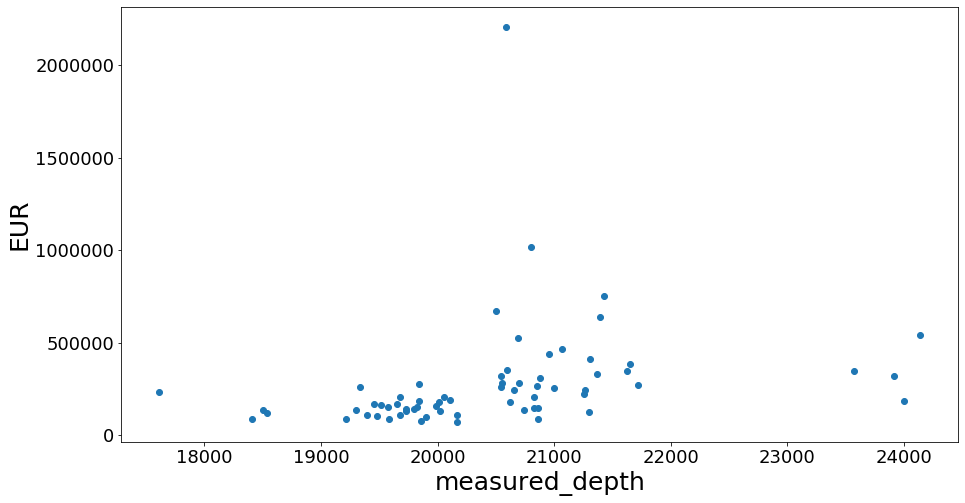

In [29]:
make_eur_comparison(eur_summary_plus,'measured_depth')

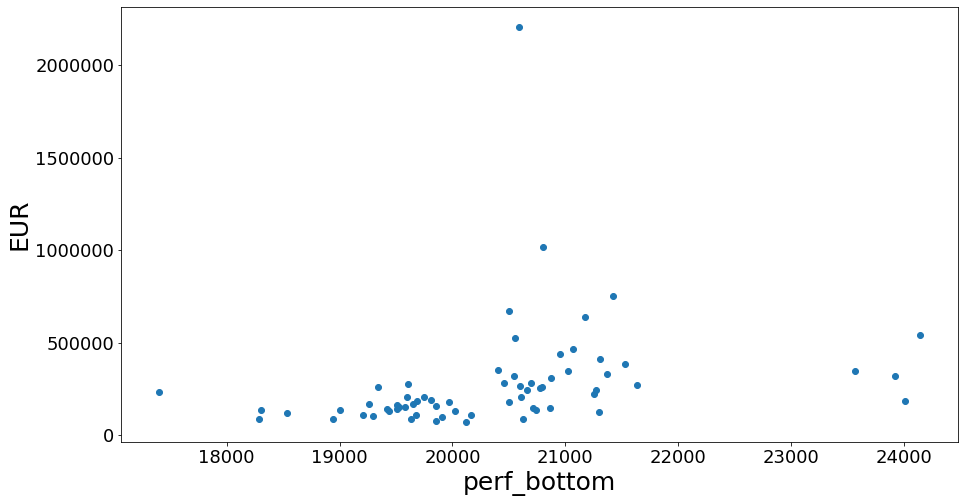

In [30]:
make_eur_comparison(eur_summary_plus,'perf_bottom')

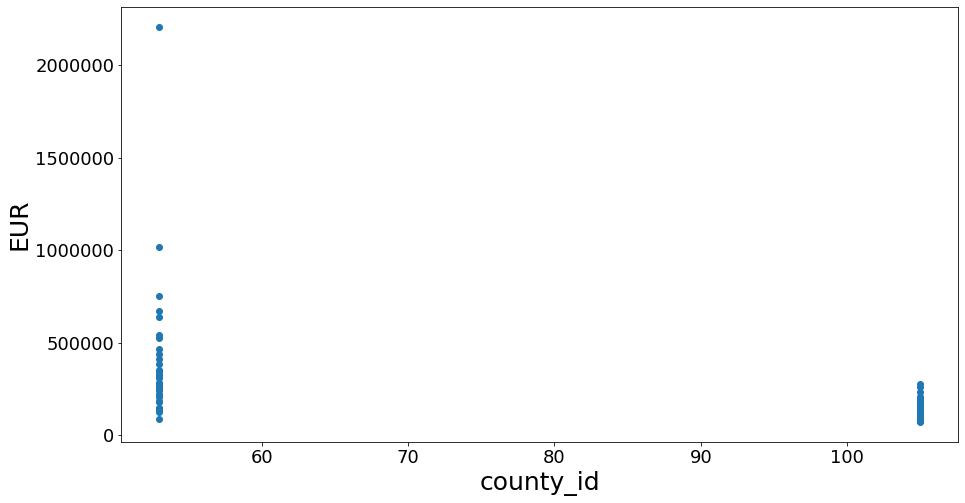

In [31]:
make_eur_comparison(eur_summary_plus,'county_id')

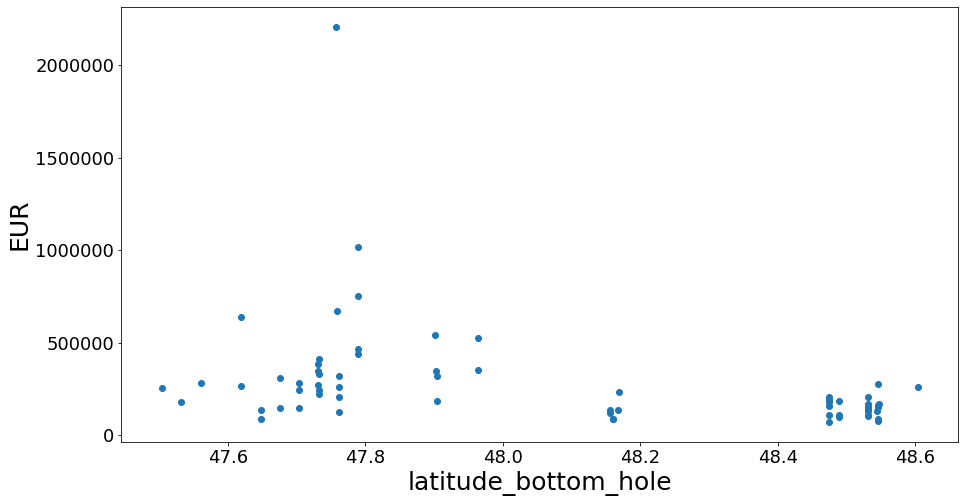

In [1035]:
make_eur_comparison(eur_summary_plus, 'latitude_bottom_hole')

## Decline Curve for well with Highest EUR

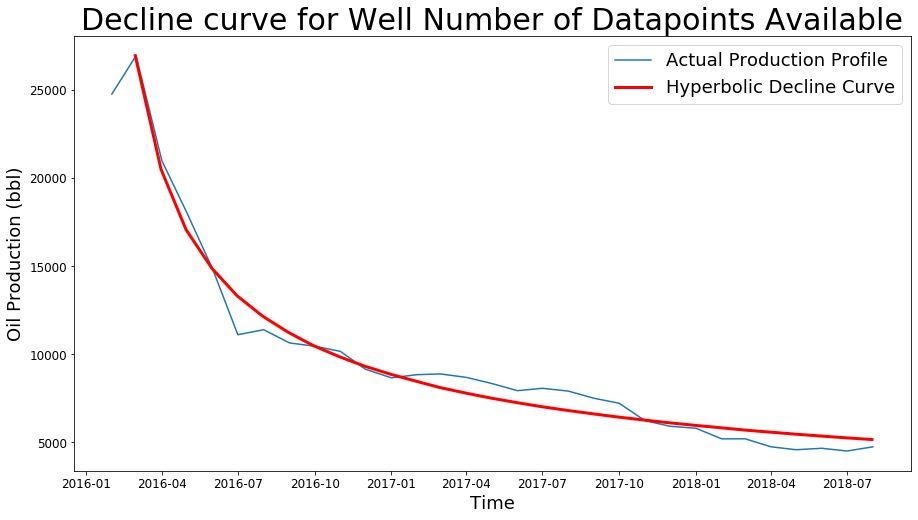

In [32]:
get_curve(well_15,33053047870000)

### Decline Curve for well with lowest EUR (Not enough relevant data points to make a good plot)

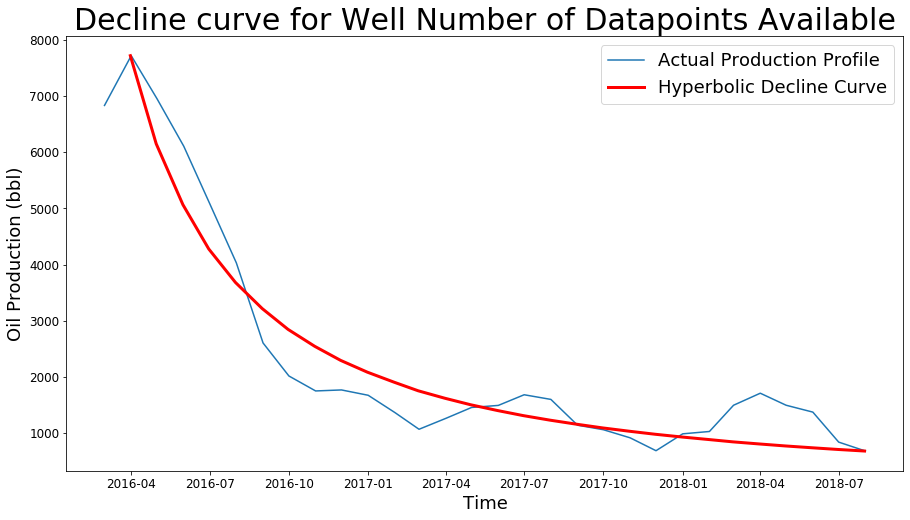

In [34]:
get_curve(well_15,33105037800000)

# Question 3

## After careful analysis and research I decided to select the Cumulative Production after 6 months as key metric for determining well productivity to be used in conjunction with IP30 (average daily rate for max production month) and first year decline

## To analyze this I group all wells based on their operator and year which they started production and made a plot of their average cumulative production after 6 months, IP30 and Initial decline rate versus the production start year. This way I can monitor the improvement in that metric in new wells drilled and put into production

## Code below plots 6 month cumulative production and IP 30 vs production start year for each company

In [35]:
def cum_ip_curve(df,operator,variable):
    for i in operator:
        df.groupby(['operator_name','start_year']).mean().sort_values(['operator_name','start_year'])[variable].loc[i].plot(figsize=(15,8), linewidth = 3)
        plt.title(i, fontsize = 25)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.legend(fontsize = 12)

## Code below plots 6 First year decline vs production start year for each company

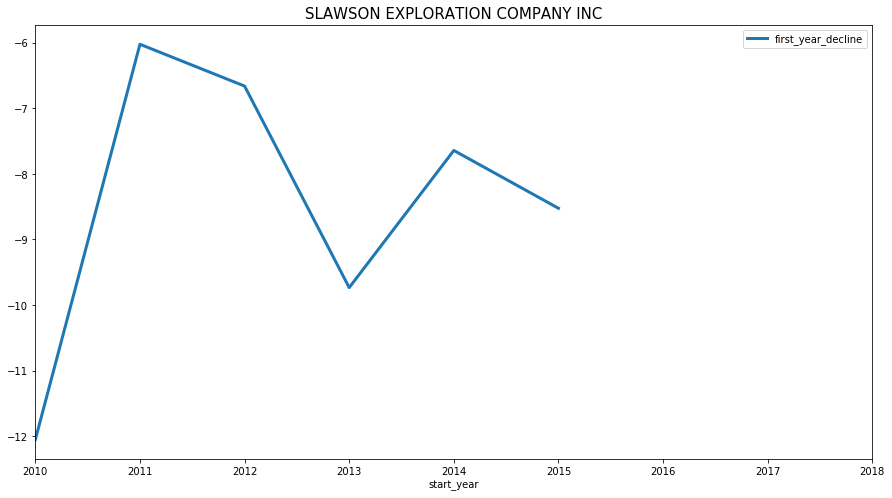

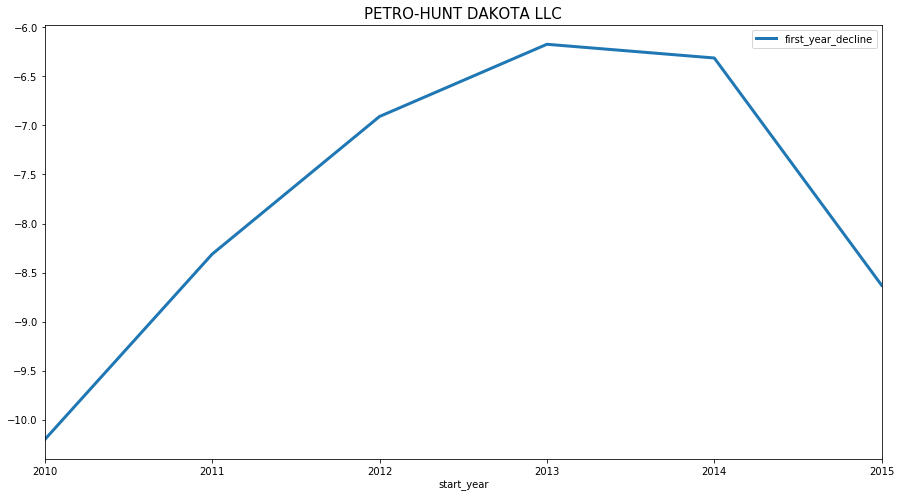

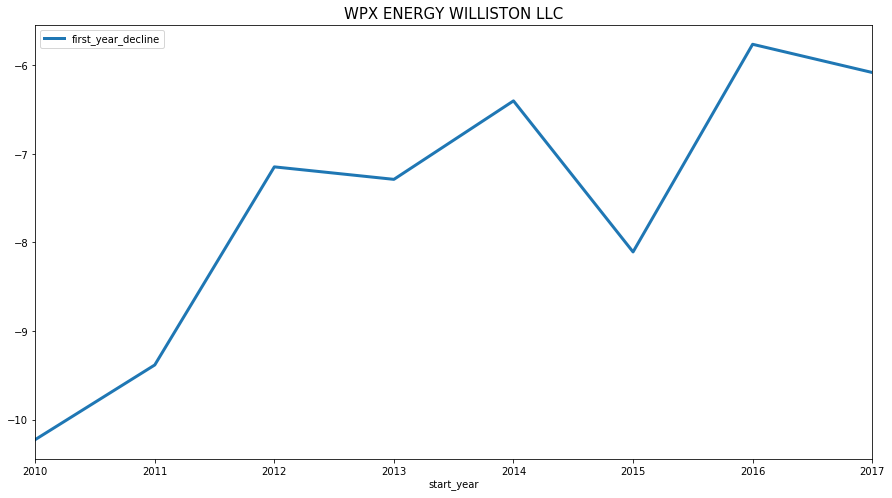

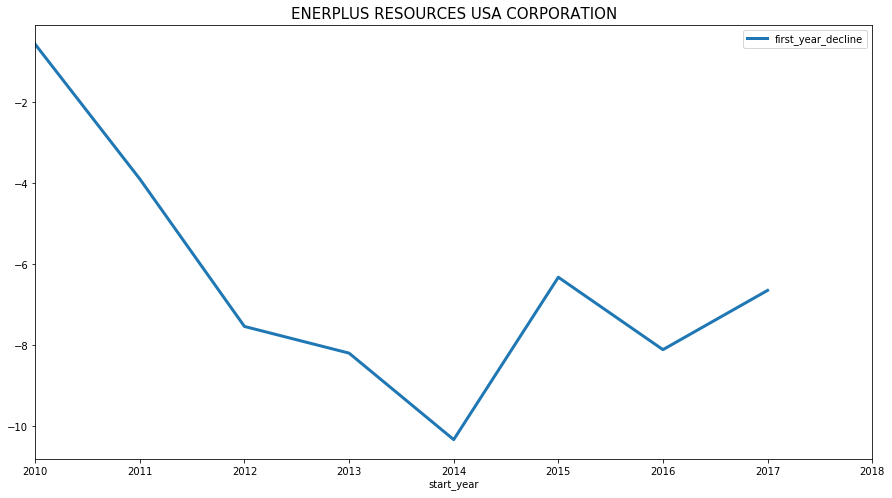

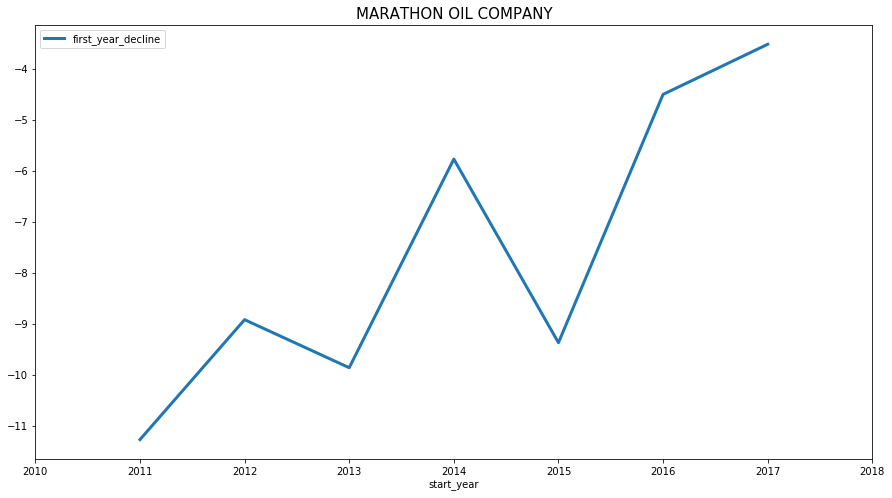

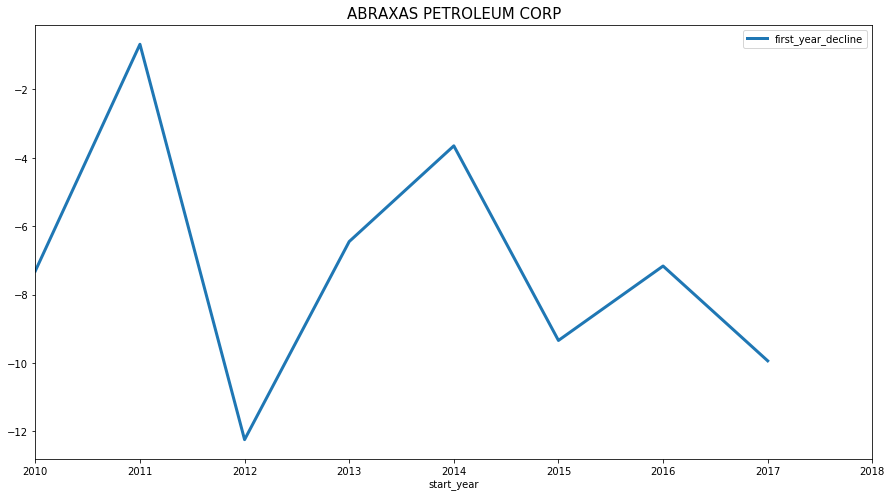

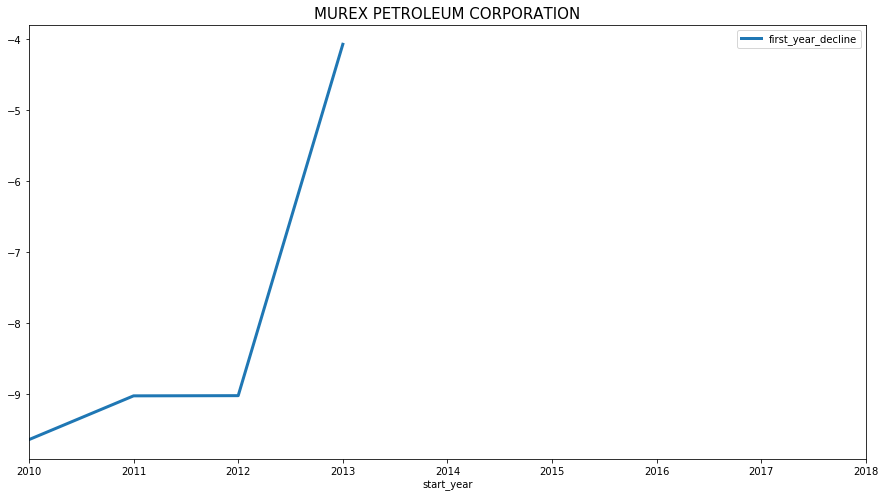

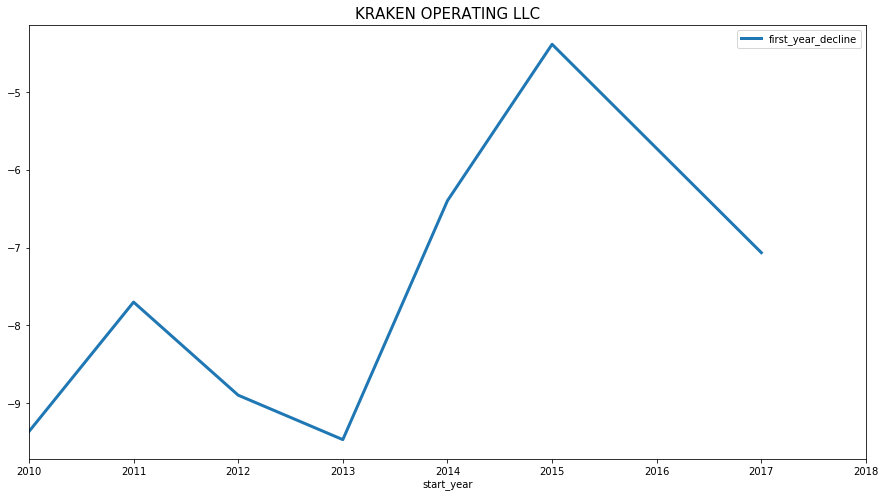

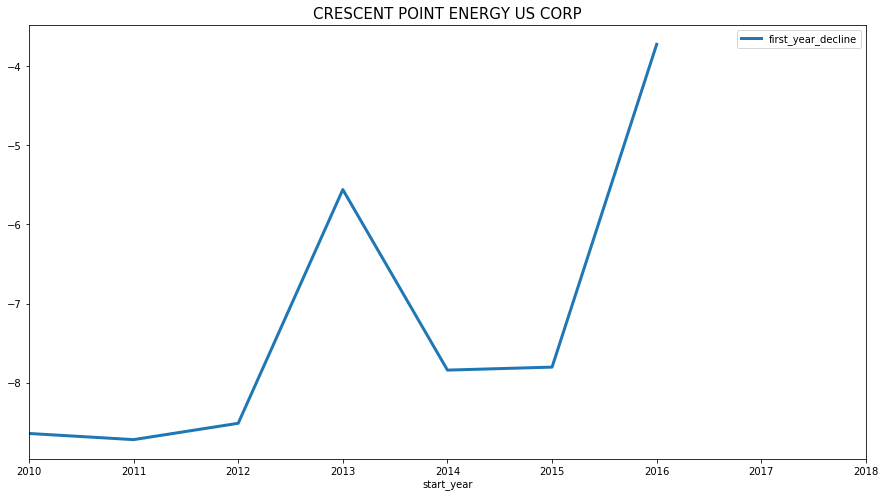

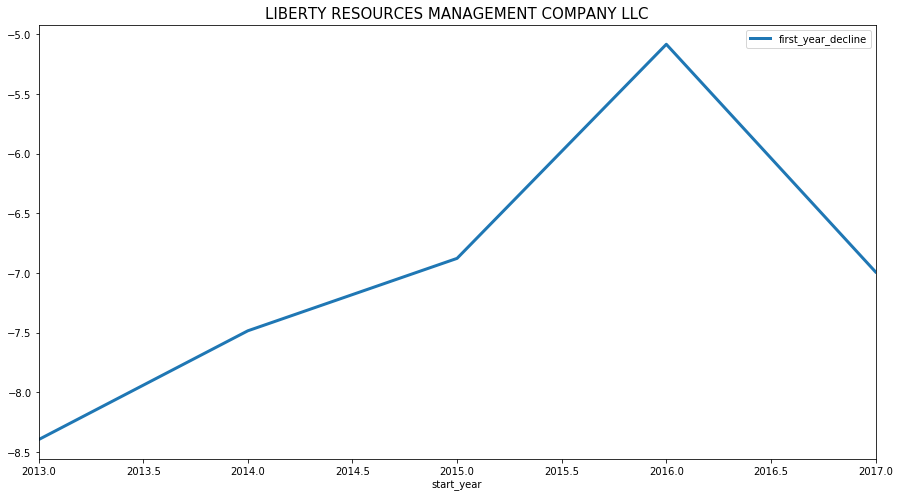

In [36]:
for i in well_prod.operator_name.unique():
    well_prod.groupby(['operator_name','start_year']).mean().sort_values(['operator_name','start_year'])[['first_year_decline']].loc[i].plot(figsize=(15,8), linewidth = 3)
    plt.title(i, fontsize = 15)

### From the above plot 2 companies stand out: Marathon Oil Company and Kraken Operating LLC

### Marathon and Kraken show a steady increase in cumulative oil production with new wells put into production with Marathon being particularly prolific. Other notable mentions are Enerplus which has a high cum_6 value but it seems to be dropping year by year same with WPX which had a drop in 2018 but has a very decent increase in productivity over the years

In [37]:
top_company = ['MARATHON OIL COMPANY','KRAKEN OPERATING LLC','ENERPLUS RESOURCES USA CORPORATION','WPX ENERGY WILLISTON LLC']

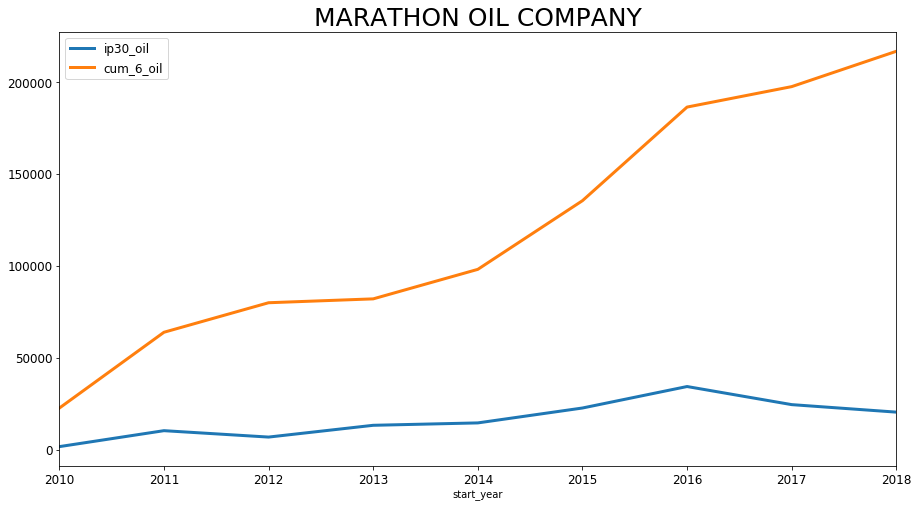

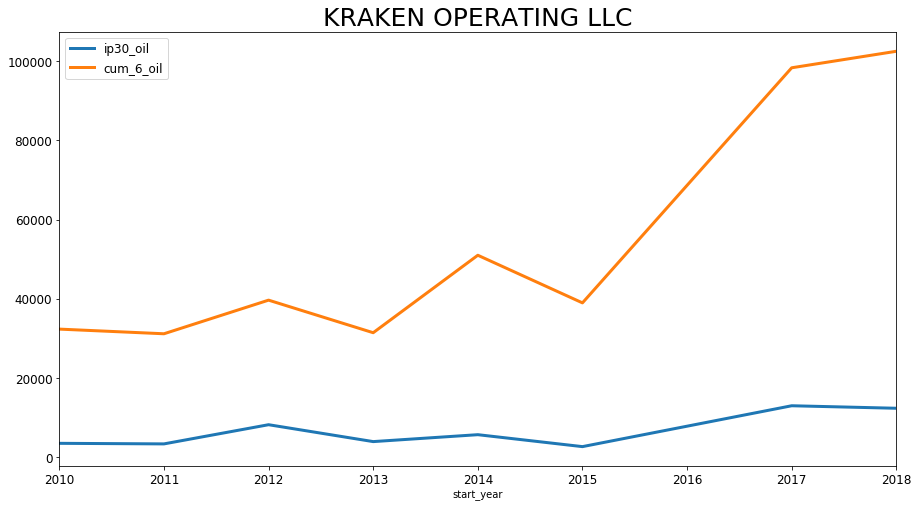

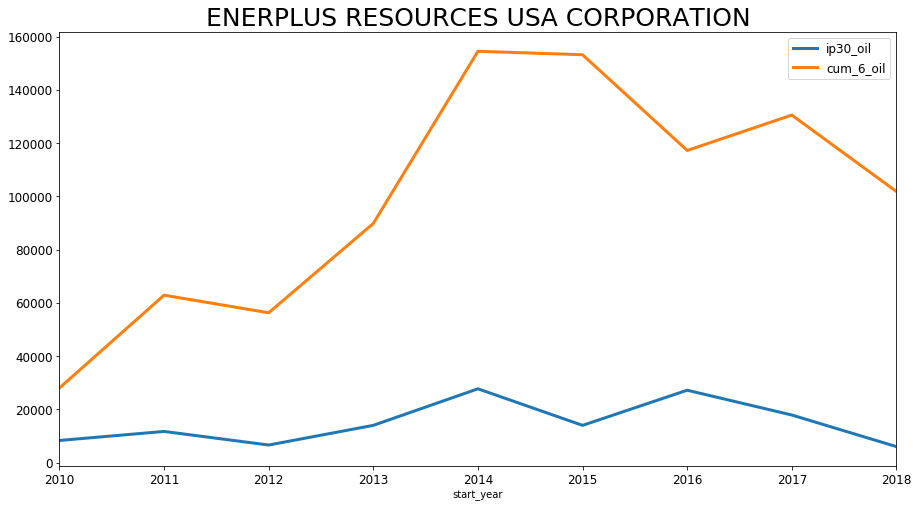

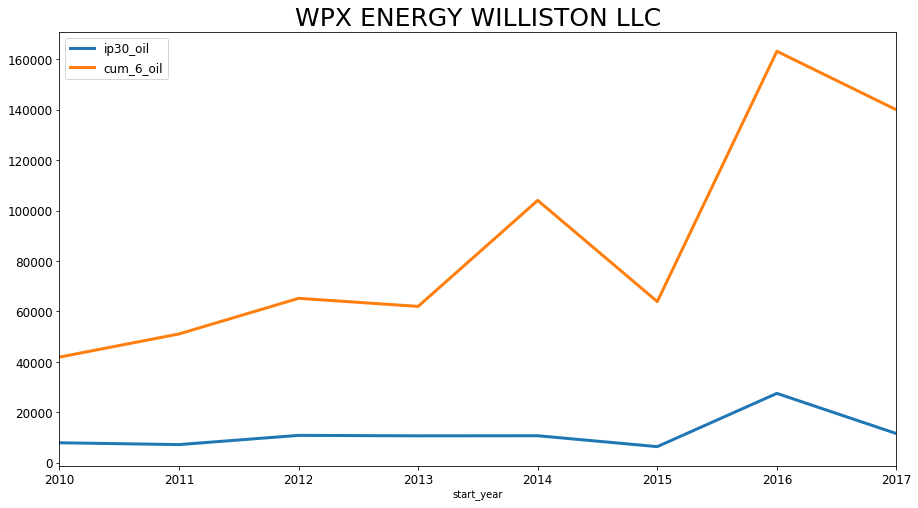

In [38]:
cum_ip_curve(well_prod,top_company,['ip30_oil','cum_6_oil'])   